## Import libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## Load dataset

In [12]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Put into DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Visualize the original dataset (pairplot in 4D → projected in 2D scatter)

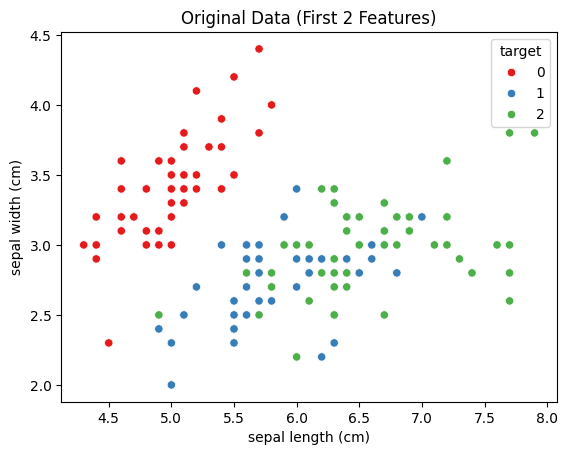

In [13]:
sns.scatterplot(x=df[feature_names[0]], y=df[feature_names[1]], hue=df['target'], palette='Set1')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Original Data (First 2 Features)")
plt.show()


## Standardize the data

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Apply PCA

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio (2 components):", pca.explained_variance_ratio_)


Explained variance ratio (2 components): [0.72962445 0.22850762]


## Visualize reduced dataset

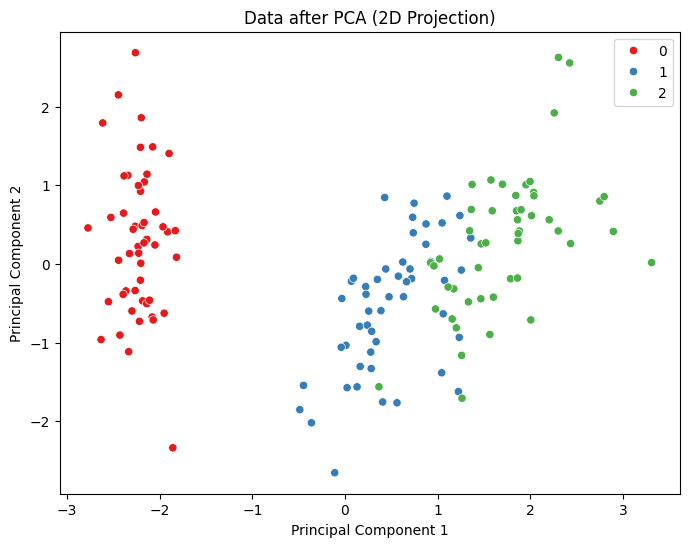

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data after PCA (2D Projection)")
plt.show()


## Scree Plot (Variance explained by each component)

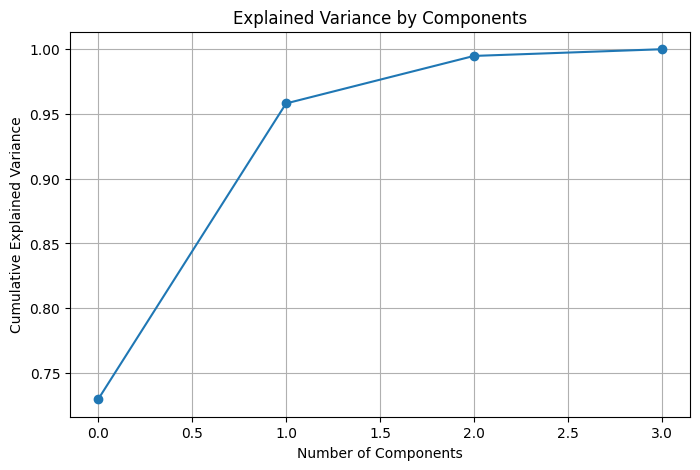

In [17]:
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Components")
plt.grid(True)
plt.show()


## PCA with 3 components

In [18]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print("Explained variance ratio (3 components):", pca_3d.explained_variance_ratio_)


Explained variance ratio (3 components): [0.72962445 0.22850762 0.03668922]


## 3D Scatter plot after PCA

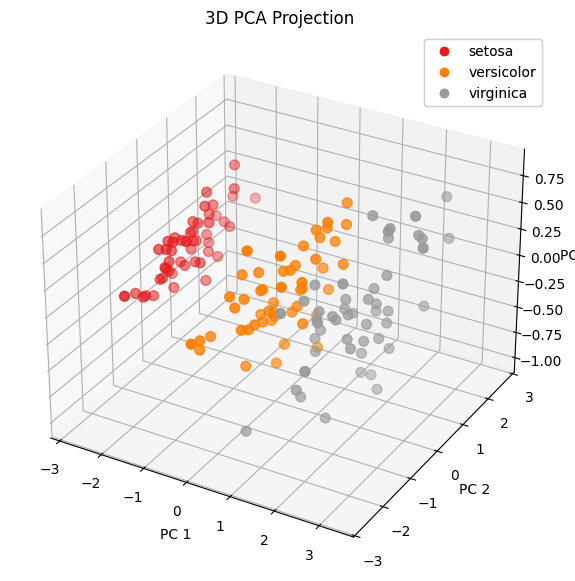

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2],
                     c=y, cmap='Set1', s=50)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_title("3D PCA Projection")

legend = ax.legend(handles=scatter.legend_elements()[0],
                   labels=list(iris.target_names), loc="upper right")
ax.add_artist(legend)

plt.show()
